accRoll:20.36	gyroXangle:10.14	compAngleX:20.36	kalAngleX:20.35

In [1]:
import serial

# Open the Arduino serial port
ser = serial.Serial("/dev/cu.usbmodem1201", 115200)

with open("log2.txt", "w") as f:
    print("Logging... press Ctrl+C to stop.")
    try:
        while True:
            line = ser.readline().decode(errors="ignore").strip()
            print(line)
            f.write(line + "\n")
    except KeyboardInterrupt:
        print("Stopped logging.")


Logging... press Ctrl+C to stop.
accRoll:-0.00	gyroXangle:-0.00	compAngleX:-0.00	kalAngleX:-0.00
accRoll:0.00	gyroXangle:0.00	compAngleX:0.00	kalAngleX:0.00
accRoll:-0.23	gyroXangle:0.00	compAngleX:-0.01	kalAngleX:0.00
accRoll:0.00	gyroXangle:0.00	compAngleX:-0.01	kalAngleX:0.00
accRoll:0.00	gyroXangle:0.00	compAngleX:-0.01	kalAngleX:0.00
accRoll:-0.00	gyroXangle:0.00	compAngleX:-0.01	kalAngleX:0.00
accRoll:0.00	gyroXangle:0.01	compAngleX:-0.01	kalAngleX:0.01
accRoll:0.23	gyroXangle:0.01	compAngleX:0.01	kalAngleX:0.01
accRoll:0.00	gyroXangle:0.01	compAngleX:0.01	kalAngleX:0.01
accRoll:-0.23	gyroXangle:0.01	compAngleX:-0.00	kalAngleX:0.01
accRoll:-0.23	gyroXangle:0.01	compAngleX:-0.02	kalAngleX:0.01
accRoll:0.00	gyroXangle:0.01	compAngleX:-0.02	kalAngleX:0.01
accRoll:-0.23	gyroXangle:0.01	compAngleX:-0.04	kalAngleX:0.00
accRoll:-0.22	gyroXangle:0.00	compAngleX:-0.05	kalAngleX:-0.00
accRoll:0.00	gyroXangle:0.01	compAngleX:-0.05	kalAngleX:-0.00
accRoll:-0.00	gyroXangle:0.00	compAngleX:-0.

In [ ]:
import pandas as pd
import re

# Read raw text
with open("log2.txt") as f:
    lines = f.readlines()

data = []
for line in lines:
    # Match key:value pairs
    pairs = re.findall(r"(\w+):([-+]?\d*\.\d+|\d+)", line)
    if pairs:
        row = {k: float(v) for k, v in pairs}
        data.append(row)

df = pd.DataFrame(data)
df["time"] = df.index * 0.02  # 20 ms loop delay in your code → seconds

print(df.head())
df.to_csv("log.csv", index=False)


   accRoll  gyroXangle  compAngleX  kalAngleX  time
0    -0.00        -0.0       -0.00       -0.0  0.00
1     0.00         0.0        0.00        0.0  0.02
2    -0.23         0.0       -0.01        0.0  0.04
3     0.00         0.0       -0.01        0.0  0.06
4     0.00         0.0       -0.01        0.0  0.08


In [3]:
import numpy as np

def settling_time(time, signal, tolerance=0.02):
    final_value = np.mean(signal[-int(len(signal)*0.1):])  # average of last 10%
    band = tolerance * abs(final_value)
    for i in range(len(signal)):
        if np.all(np.abs(signal[i:] - final_value) <= band):
            return time[i] - time[0]
    return None

def overshoot(signal):
    final_value = np.mean(signal[-int(len(signal)*0.1):])
    peak = np.max(signal)
    return peak - final_value

def steady_state_error(reference, signal):
    # reference = known angle (e.g. 30° tilt), or accelerometer baseline
    return np.mean(signal[-int(len(signal)*0.1):] - reference)

def noise_level(signal):
    return np.std(signal)

def drift(time, signal):
    return (signal[-1] - signal[0]) / ((time[-1] - time[0]) / 1000.0)  # deg/sec


In [4]:
kal = df["kalAngleX"].to_numpy()
comp = df["compAngleX"].to_numpy()
time = df["time"].to_numpy()

print("Settling time:", settling_time(time, kal, tolerance=0.02), "s")
print("Settling time (comp):", settling_time(time, comp, tolerance=0.02), "s")
#print("Steady-state error:", steady_state_error(30.0, kal), "deg")
#print("Steady-state error (comp):", steady_state_error(30.0, comp), "deg")
print("Overshoot:", overshoot(kal), "deg")
print("Overshoot (comp):", overshoot(comp), "deg")
print("Noise:", noise_level(kal), "deg RMS")
print("Noise (comp):", noise_level(comp), "deg RMS")
print("Drift:", drift(time, kal), "deg/sec")
print("Drift (comp):", drift(time, comp), "deg/sec")

Settling time: None s
Settling time (comp): None s
Overshoot: 14.587352941176471 deg
Overshoot (comp): 15.423529411764706 deg
Noise: 12.905443050283905 deg RMS
Noise (comp): 12.64074561253442 deg RMS
Drift: -32.163742690058484 deg/sec
Drift (comp): -126.7056530214425 deg/sec


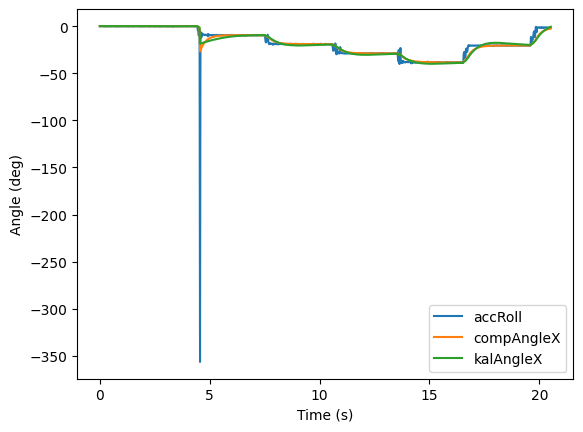

In [5]:
import matplotlib.pyplot as plt

plt.plot(df["time"], df["accRoll"], label="accRoll")
plt.plot(df["time"], df["compAngleX"], label="compAngleX")
plt.plot(df["time"], df["kalAngleX"], label="kalAngleX")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Angle (deg)")
plt.show()


In [46]:
data = []
for line in lines:
    # Match key:value pairs
    pairs = re.findall(r"(\w+):([-+]?\d*\.\d+|\d+)", line)
    if pairs:
        row = {k: float(v) for k, v in pairs}
        data.append(row)

df = pd.DataFrame(data)
df["time"] = df.index * 0.02  # 20 ms loop delay in your code → seconds

print(df.head())
df.to_csv("log2.csv", index=False)


   accRoll  gyroXangle  compAngleX  kalAngleX  time
0    -0.00        -0.0       -0.00       -0.0  0.00
1     0.00         0.0        0.00        0.0  0.02
2    -0.23         0.0       -0.01        0.0  0.04
3     0.00         0.0       -0.01        0.0  0.06
4     0.00         0.0       -0.01        0.0  0.08


In [47]:
df.drop(228, inplace=True)
df.drop(229, inplace=True)
df.drop(230, inplace=True)

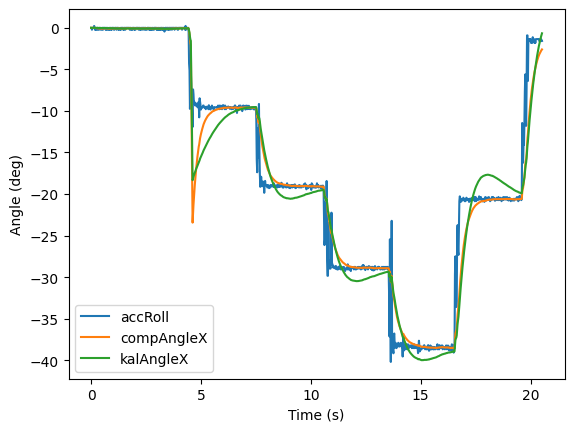

In [48]:
import matplotlib.pyplot as plt

plt.plot(df["time"], df["accRoll"], label="accRoll")
plt.plot(df["time"], df["compAngleX"], label="compAngleX")
plt.plot(df["time"], df["kalAngleX"], label="kalAngleX")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Angle (deg)")
plt.show()

In [50]:
kal = df["kalAngleX"].to_numpy()
comp = df["compAngleX"].to_numpy()
time = df["time"].to_numpy()

print("Settling time:", settling_time(time, kal, tolerance=0.02), "s")
print("Settling time (comp):", settling_time(time, comp, tolerance=0.02), "s")
#print("Steady-state error:", steady_state_error(30.0, kal), "deg")
#print("Steady-state error (comp):", steady_state_error(30.0, comp), "deg")
print("Overshoot:", overshoot(kal), "deg")
print("Overshoot (comp):", overshoot(comp), "deg")
print("Noise:", noise_level(kal), "deg RMS")
print("Noise (comp):", noise_level(comp), "deg RMS")
print("Drift:", drift(time, kal), "deg/sec")
print("Drift (comp):", drift(time, comp), "deg/sec")

Settling time: None s
Settling time (comp): None s
Overshoot: 14.587352941176471 deg
Overshoot (comp): 15.423529411764706 deg
Noise: 12.924284774204864 deg RMS
Noise (comp): 12.651835003136519 deg RMS
Drift: -32.163742690058484 deg/sec
Drift (comp): -126.7056530214425 deg/sec
